2024-06-12 10:31:10.969 
  command:

    streamlit run /usr/lib/python3/dist-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

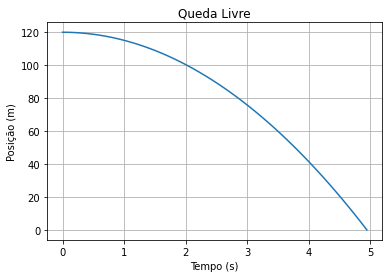

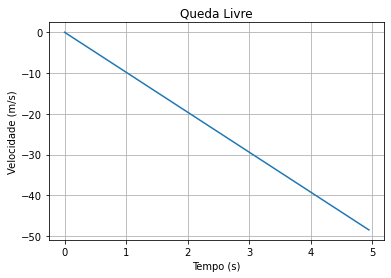

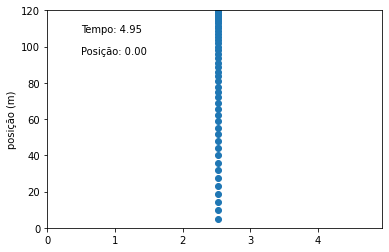

In [1]:
import streamlit as st
import streamlit.components.v1 as components
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import math

# Entrada de valores
h = st.number_input("Altura da queda (em metros)", value=120.0)
h = float(h)
v0 = st.number_input("Velocidade Inicial (em m/s)", value=0.0)
v0 = float(v0)
g = 9.8
# tmin = st.sidebar.number_input("Tempo mínimo", value=0)
# tmax = st.sidebar.number_input("Tempo máximo", value=10)
# tvals = st.sidebar.slider("Intervalo de tempo", tmin, tmax, (0, 8))


def posicao(t, v0, g):
    s = h + v0 * t - 0.5 * g * t * t
    return s


def velocidade(t, v0, g):
    v = v0 - g * t
    return v


def update(frame):
    grafico.set_data(t[len(t)//2], pos[:frame])
    ptext.set_text("Posição: {:.2f}".format(pos[frame]))
    ttext.set_text("Tempo: {:.2f}".format(t[frame]))
    return grafico,


# calcula o tempo final
tf = (v0 + math.sqrt(2*g*h + v0**2))/g
t = np.linspace(0, tf)

pos = posicao(t, v0, g)
vel = velocidade(t, v0, g)


# Gráfico 1: posição
fig1, ax1 = plt.subplots()
ax1.plot(t, pos)
ax1.set_title("Queda Livre")
ax1.set_xlabel("Tempo (s)")
ax1.set_ylabel("Posição (m)")
ax1.grid(True)
st.pyplot(fig1)
st.write("Gráfico da Posição x Tempo")

# Gráfico 2: velocidade
fig2, ax2 = plt.subplots()
ax2.plot(t, vel)
ax2.set_title("Queda Livre")
ax2.set_xlabel("Tempo (s)")
ax2.set_ylabel("Velocidade (m/s)")
ax2.grid(True)
st.pyplot(fig2)
st.write("Gráfico de Velocidade x Tempo")


# Gráfico 3: animação
fig3, ax3 = plt.subplots()
grafico, = ax3.plot([], [], 'o')
ax3.set_xlim(0, tf)
ax3.set_ylim(0, h + 1.1*v0**2/(2*g))
ax3.set_ylabel("posição (m)")
ttext = ax3.text(0.1, 0.9, '', transform=ax3.transAxes)
ptext = ax3.text(0.1, 0.8, '', transform=ax3.transAxes)

anim = FuncAnimation(fig3, update, frames=len(t), blit=True)

# salva a animação num arquivo html
with open("myvideo.html", "w") as fname:
  print(anim.to_jshtml(), file=fname)

# abre o arquivo de animação
with open("myvideo.html", "r") as fname:
    source_code = fname.read()

# mostra a animação
components.html(source_code, height=900, width=900)